Universidad de Nariño 
Maestría en Gestión de Tecnologías de Información y Conocimiento 
Electiva Aprendizaje Automático
Actividad de la Guia 1 

Michel Daniela Bravo
Tatiana Maya Pianda

In [5]:
import pandas as pd

1) Lea únicamente los valores numéricos del archivo “Adult_Parte1.xlsx” y guárdelos en un dataframe de Pandas llamado X

In [7]:
X=pd.read_excel("D:\Mgtic\Machine Learning\Clase 1\Adult_Parte1.xlsx")
X.head()

,Edad,Nivel Educativo (máximo valor = postgrado),Hs.que trabaja x semana,Gana más de 50K anuales? (1=si)
0,36,13,55,1
1,29,13,50,1
2,34,11,32,1
3,33,13,25,1
4,30,10,45,0


2) Obtenga el tamaño de ‘X’ en cantidad de filas y columnas.

In [8]:
print(X.shape)

(11029, 4)



3) Calcule el valor mínimo de cada columna de ‘X’.

In [9]:
print(X.dtypes)
print("Edad mínimo:",X.Edad.min())
print("Nivel Educativo mínimo:",X["Nivel Educativo (máximo valor = postgrado)"].min())
print("Horas por semana mínimo:",X["Hs.que trabaja x semana"].min())

Edad                                          int64
Nivel Educativo (máximo valor = postgrado)    int64
Hs.que trabaja x semana                       int64
Gana más de 50K anuales? (1=si)               int64
dtype: object
Edad mínimo: 17
Nivel Educativo mínimo: 1
Horas por semana mínimo: 1


In [10]:
X.min()

Edad                                          17
Nivel Educativo (máximo valor = postgrado)     1
Hs.que trabaja x semana                        1
Gana más de 50K anuales? (1=si)                0
dtype: int64

4) Ahora obtenga el máximo, pero por cada fila

In [11]:
X.transpose().max()

0        55
1        50
2        34
3        33
4        45
         ..
11024    50
11025    55
11026    50
11027    60
11028    43
Length: 11029, dtype: int64

5) Realice una escala lineal de ‘X’ por columna. Para esto deberá a cada valor, restarle el mínimo de la columna y dividirlo por la diferencia entre el máximo y el mínimo de la columna correspondiente

In [12]:
def escala_lineal(X):
    df=pd.DataFrame()
    for c in X.columns:
        df[c]=(X[c]-X[c].min())/(X[c].max()-X[c].min())
    return df

X_escala=escala_lineal(X)
X_escala.head()

,Edad,Nivel Educativo (máximo valor = postgrado),Hs.que trabaja x semana,Gana más de 50K anuales? (1=si)
0,0.260274,0.800000,0.551020,1.0
1,0.164384,0.800000,0.500000,1.0
2,0.232877,0.666667,0.316327,1.0
3,0.219178,0.800000,0.244898,1.0
4,0.178082,0.600000,0.448980,0.0


In [13]:
X_escala.max()

Edad                                          1.0
Nivel Educativo (máximo valor = postgrado)    1.0
Hs.que trabaja x semana                       1.0
Gana más de 50K anuales? (1=si)               1.0
dtype: float64

6) Reordene aleatoriamente las filas de ‘X’.

In [14]:
X_escala_ord=X_escala.sample(len(X_escala),random_state=4)
X_escala_ord.reset_index(inplace=True)
X_escala_ord

,index,Edad,Nivel Educativo (máximo valor = postgrado),Hs.que trabaja x semana,Gana más de 50K anuales? (1=si)
0,6200,0.041096,0.133333,0.397959,0.0
1,10936,0.452055,0.933333,0.602041,1.0
2,6902,0.383562,0.866667,0.448980,1.0
3,7784,0.328767,0.800000,0.500000,1.0
4,2691,0.123288,0.200000,0.397959,0.0
...,...,...,...,...,...
11024,6017,0.369863,0.933333,0.397959,1.0
11025,709,0.301370,0.600000,0.500000,1.0
11026,10679,0.054795,0.533333,0.530612,0.0
11027,8366,0.301370,0.533333,0.438776,0.0


7) Separe la última columna del conjunto de datos y almacénelo en una variable llamada ‘Y’. ‘X’ deberá contener el resto de las columnas.

In [15]:
Y=X_escala_ord['Gana más de 50K anuales? (1=si)']
X=X_escala_ord.drop(columns=['Gana más de 50K anuales? (1=si)','index'])

In [16]:
Y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Gana más de 50K anuales? (1=si), dtype: float64

In [17]:
X.head()

,Edad,Nivel Educativo (máximo valor = postgrado),Hs.que trabaja x semana
0,0.041096,0.133333,0.397959
1,0.452055,0.933333,0.602041
2,0.383562,0.866667,0.448980
3,0.328767,0.800000,0.500000
4,0.123288,0.200000,0.397959


8) Separe el 80% de las filas de ‘X’ en una variable llamada ‘X_train’ y el 20% restante en ‘X_test’. Haga lo mismo con ‘Y’ manteniendo el orden obtenido del punto 6.

In [18]:
indice_80=int(len(X)*0.8)
X_train=X[0:indice_80]
X_test=X[indice_80:len(X)]

print(len(X_train))
print(len(X_test))
print(len(X))

8823
2206
11029


In [19]:
indice_80=int(len(X)*0.8)
Y_train=Y[0:indice_80]
Y_test=Y[indice_80:len(X)]

print(len(Y_train))
print(len(Y_test))
print(len(Y))

8823
2206
11029


9) Transponga la matriz ‘X’. Tenga en cuenta que si transpone antes de la escala lineal no seguirá obteniendo el mismo resultado en los Ejercicios 5, 6, 7 y 8.

In [20]:
X.transpose()

,0,1,2,3,4,5,6,7,8,9,...,11019,11020,11021,11022,11023,11024,11025,11026,11027,11028
Edad,0.041096,0.452055,0.383562,0.328767,0.123288,0.438356,0.013699,0.095890,0.205479,0.30137,...,0.150685,0.191781,0.287671,0.712329,0.041096,0.369863,0.30137,0.054795,0.301370,0.328767
Nivel Educativo (máximo valor = postgrado),0.133333,0.933333,0.866667,0.800000,0.200000,0.600000,0.533333,0.600000,0.533333,0.80000,...,0.533333,0.533333,0.333333,1.000000,0.600000,0.933333,0.60000,0.533333,0.533333,0.533333
Hs.que trabaja x semana,0.397959,0.602041,0.448980,0.500000,0.397959,0.397959,0.397959,0.397959,0.397959,0.50000,...,0.397959,0.397959,0.397959,0.500000,0.255102,0.397959,0.50000,0.530612,0.438776,0.397959


10) Defina un vector ‘prediction’ del mismo tamaño que ‘Y_test’ cuyo contenido sean únicamente ceros y unos ubicados aleatoriamente.

In [21]:
import random,math

prediction=[]
for i in Y_test:
    prediction.append(round(random.uniform(0, 1))*1.0)

print(len(prediction))

2206



11) Considerando que el vector del Ejercicio 10 es el resultado de clasificar los datos de ‘X_train’ con un modelo predictivo, obtener el número de coincidencias con ‘T_test’

In [22]:
nro_coincidencias=pd.DataFrame()
nro_coincidencias['real']=Y_test
nro_coincidencias['predicho']=prediction
nro_coincidencias['coincidencia']=prediction==Y_test
nro_coincidencias.head(100)

,real,predicho,coincidencia
8823,1.0,1.0,True
8824,1.0,1.0,True
8825,1.0,1.0,True
8826,1.0,0.0,False
8827,0.0,1.0,False
...,...,...,...
8918,1.0,0.0,False
8919,1.0,1.0,True
8920,0.0,0.0,True
8921,0.0,1.0,False


In [23]:
print(len(nro_coincidencias[nro_coincidencias.coincidencia==True]))

1151


In [25]:
nro_coincidencias.groupby('coincidencia').count()['predicho']

coincidencia
False    1055
True     1151
Name: predicho, dtype: int64

12) Construir una matriz de confusión en base al vector ‘T_test’ y ‘prediction. Puede revisar https://en.wikipedia.org/wiki/Confusion_matrix para ayudarse en los cálculos

In [26]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y_test,prediction).ravel()
print("verdaderos positivos:",tp)
print("verdaderos negativos:",tn)
print("falsos positivos:",fp)
print("falsos negativos:",fn)
print(confusion_matrix(Y_test,prediction))

verdaderos positivos: 634
verdaderos negativos: 517
falsos positivos: 445
falsos negativos: 610
[[517 445]
 [610 634]]


In [27]:
import matplotlib.pyplot as plt
import itertools
# Función para plot de la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "green")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


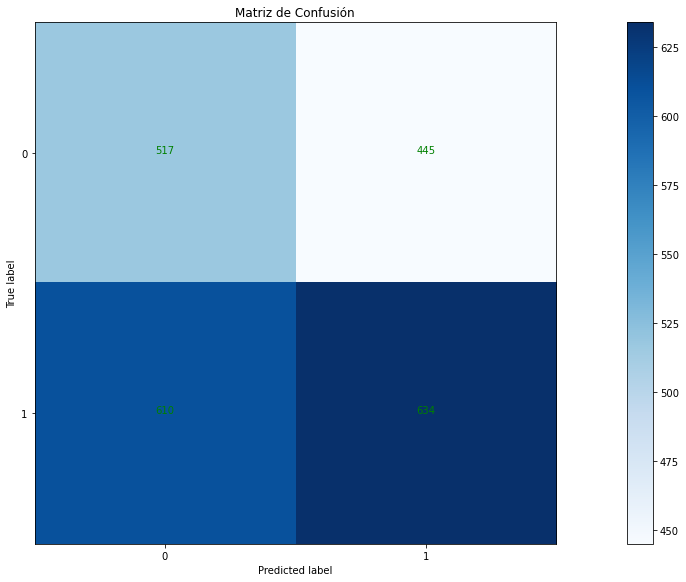

In [28]:
import numpy as np
class_names = [0,1]
cnf_matrix = confusion_matrix(Y_test, prediction) 
np.set_printoptions(precision=2)
plt.figure(figsize = (20,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matriz de Confusión')

13. Calcule la métrica de precisión de cada una de las clases con los valores obtenidos en la matriz de confusión.

Clase 0

In [103]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, prediction, labels = [0, 1], pos_label = 0)
print (precision)

0.4587400177462289


In [ ]:
Clase 1

In [104]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, prediction, labels = [0, 1], pos_label = 1)
print (precision)

0.58758109360519


14. Calcule la métrica de recall de cada una de las clases con los valores obtenidos en la matriz de confusión. 

Clase 0

In [111]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, prediction, labels = [0, 1], pos_label = 0)
print (recall)

0.5374220374220374


Clase 1

In [106]:
from sklearn.metrics import recall_score
recall = recall_score(Y_test, prediction, labels = [0, 1], pos_label = 1)
print (recall)

0.5096463022508039


15. Calcule la métrica f1-score de cada una de las clases con los valores obtenidos en la matriz de confusión.

Clase 0

In [112]:
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, prediction,labels = [0, 1], pos_label = 0)
print (f1_score)

0.49497367161321204


Clase 1

In [113]:
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, prediction,labels = [0, 1], pos_label = 1)
print (f1_score)

0.5458458889367197


16. Calcule el accuracy del modelo

In [40]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print (accuracy)

0.5077062556663645


17. Consultar la métrica accuracy_balanced y calcularla de acuerdo con la matriz de confusión obtenida.

In [41]:
from sklearn.metrics import balanced_accuracy_score
b_a = balanced_accuracy_score(Y_test, prediction)
print (b_a)

0.5054189423160484
